### **``Principal Component Analysis (PCA)``**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

In [33]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
iris.feature_names,iris.target_names,iris.target

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [35]:
iris_df = pd.concat([pd.DataFrame(iris.data,columns=iris.feature_names),pd.DataFrame(iris.target,columns=['target'])],axis=1)

In [36]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
class_label = {0:'iris-setosa',1:'iris-versicolor',2:'iris-virginica'}

In [38]:
iris_df['target'] = iris_df['target'].map(lambda row: class_label[row])

In [39]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [40]:
iris_df.shape

(150, 5)

In [41]:
iris_df['target'].value_counts()

iris-versicolor    50
iris-virginica     50
iris-setosa        50
Name: target, dtype: int64

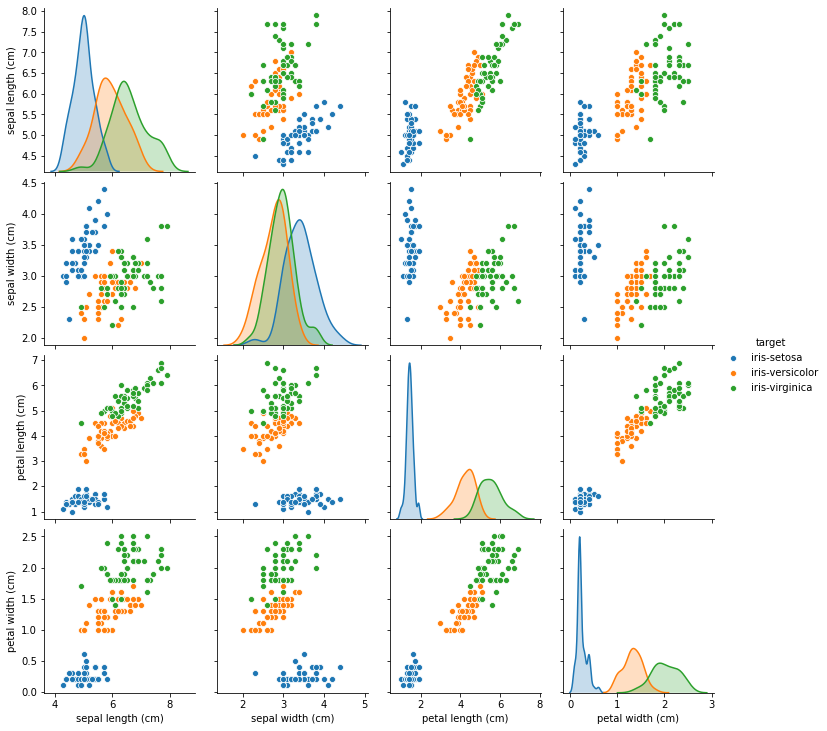

In [44]:
sns.pairplot(data=iris_df,hue='target',diag_kind='kde');

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss = StandardScaler()

In [55]:
iris_st_df = pd.concat([pd.DataFrame(ss.fit_transform(iris_df.iloc[:,0:4]),columns=iris.feature_names),iris_df['target']],axis=1)

In [56]:
iris_st_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,iris-setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,iris-setosa
2,-1.385353,0.328414,-1.397064,-1.315444,iris-setosa
3,-1.506521,0.098217,-1.283389,-1.315444,iris-setosa
4,-1.021849,1.249201,-1.340227,-1.315444,iris-setosa


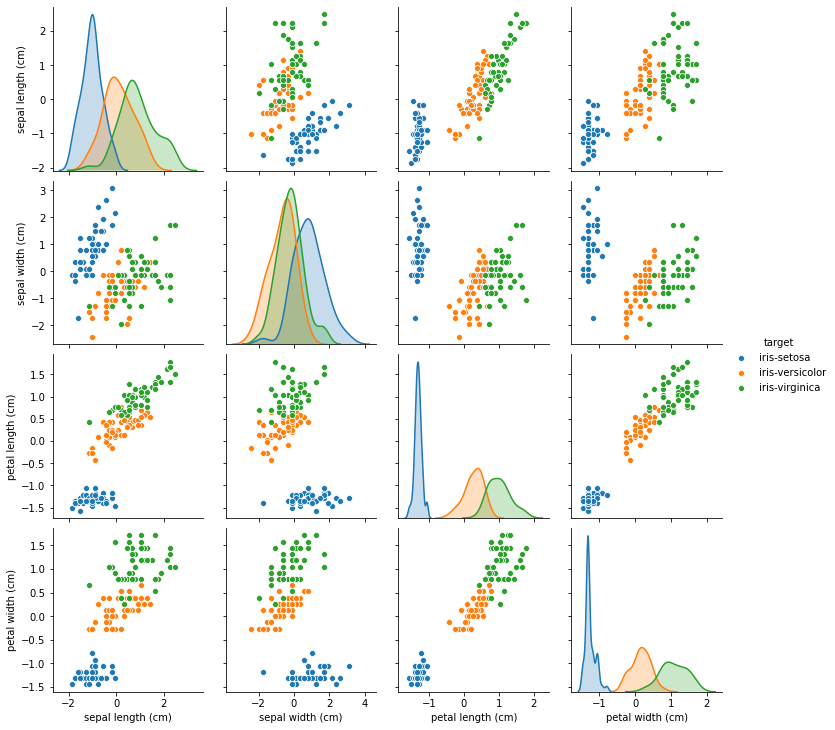

In [58]:
sns.pairplot(data=iris_st_df,hue='target');

In [59]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)

In [63]:
pca.fit(iris_st_df.iloc[:,0:4])

PCA(n_components=2)

In [66]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

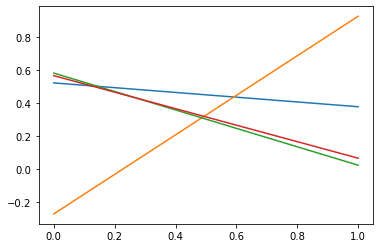

In [71]:
plt.plot(pca.components_);

In [72]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [73]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [78]:
iris_pca_comp = pd.DataFrame(pca.fit_transform(iris_st_df.iloc[:,0:4]),columns=['Component1','Component2'])

In [79]:
iris_pca_comp.head()

,Component1,Component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [80]:
iris_pca_comp.shape

(150, 2)

In [82]:
iris_pca_comp = pd.concat([iris_pca_comp,iris_st_df['target']],axis=1)

In [83]:
iris_pca_comp.head()

,Component1,Component2,target
0,-2.264703,0.480027,iris-setosa
1,-2.080961,-0.674134,iris-setosa
2,-2.364229,-0.341908,iris-setosa
3,-2.299384,-0.597395,iris-setosa
4,-2.389842,0.646835,iris-setosa


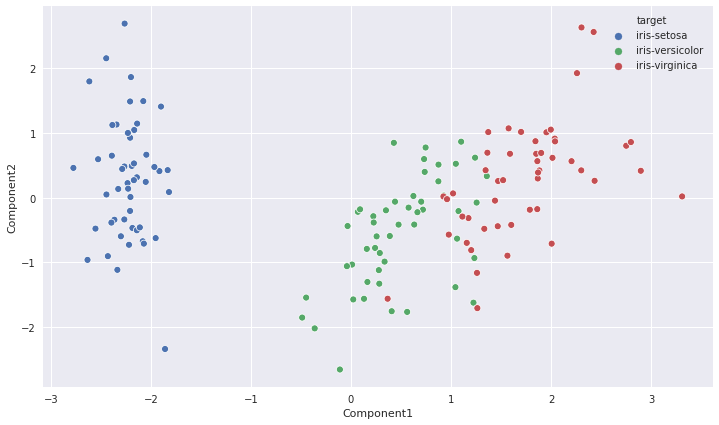

In [87]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,7))
    sns.scatterplot(x='Component1',y='Component2',data=iris_pca_comp,hue='target');